In [1]:
# importing required libraries
import numpy as np 
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

# PART A - DEEP LEARNING MODEL

In [ ]:
data_path = 'flowers'
labels = ['daisy','dandelion','rose','sunflower','tulip']
image = []
image_label = []
for label in labels:
    data = os.path.join(data_path,label)
    for img in os.listdir(data):
        try:
            im = cv2.imread(os.path.join(data,img),cv2.IMREAD_COLOR)
            im = cv2.resize(im,(128,128))
            # Using the Canny filter with different parameters
            
            image.append(im)
            image_label.append(labels.index(label))
            
            
        except Exception as e:
            pass

In [3]:
np.unique(image_label)

array([0, 1, 2, 3, 4])

# Plotting Random Images

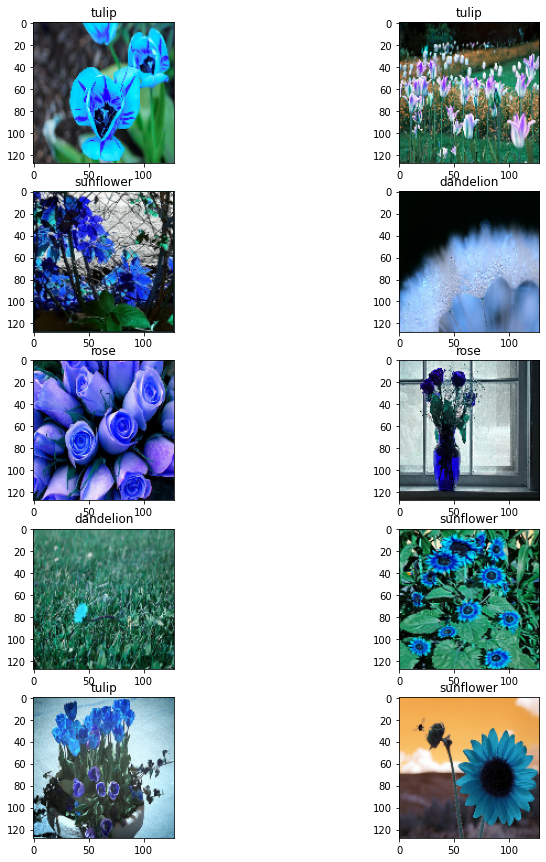

In [4]:
import matplotlib.pyplot as plt
import random
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(12,15)
for i in range(5):
    for j in range(2):
        ran =random.randint(0,len(image))
        ax[i, j].imshow(image[ran])
        ax[i, j].set_title(labels[image_label[ran]])

In [5]:
image = np.array(image)/255.0
image_label = np.array(image_label)
image =image.reshape(-1,128,128,3)
image_label= image_label.reshape(-1,1)
image_label= tf.keras.utils.to_categorical(image_label,5,)

### Defining an Image data generator function to preprocess input image before passing it to the model

In [6]:
datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
fill_mode= 'nearest',
horizontal_flip=False,
vertical_flip=False,
shear_range=0.1,
zoom_range = 0.1, 
width_shift_range=0.2,  
height_shift_range=0.2
)
datagenerator.fit(image)

## Splitting the images into training and testing

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(image,image_label)

In [131]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [149]:
model_A = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(5,5),padding ='same',strides=(2,2),activation='relu',input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(5,activation='softmax')
])

In [152]:
tensorboard_A = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelA'+ str(time())))

In [153]:
model_A.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [154]:
run_A =model_A.fit(datagenerator.flow(x_train,y_train,batch_size=32),epochs=20,validation_data=datagenerator.flow(x_test,y_test), callbacks = tensorboard_A)

Epoch 1/20
102/102 [==============================] - 34s 331ms/step - loss: 1.4695 - accuracy: 0.2940 - val_loss: 1.2962 - val_accuracy: 0.3700
Epoch 2/20
102/102 [==============================] - 32s 314ms/step - loss: 1.2367 - accuracy: 0.4260 - val_loss: 1.1630 - val_accuracy: 0.4912
Epoch 3/20
102/102 [==============================] - 34s 332ms/step - loss: 1.1184 - accuracy: 0.5299 - val_loss: 1.0644 - val_accuracy: 0.5800
Epoch 4/20
102/102 [==============================] - 34s 332ms/step - loss: 1.0438 - accuracy: 0.5864 - val_loss: 1.0137 - val_accuracy: 0.6068
Epoch 5/20
102/102 [==============================] - 32s 309ms/step - loss: 0.9296 - accuracy: 0.6373 - val_loss: 0.9549 - val_accuracy: 0.6559
Epoch 6/20
102/102 [==============================] - 31s 306ms/step - loss: 0.8885 - accuracy: 0.6582 - val_loss: 0.9717 - val_accuracy: 0.6522
Epoch 7/20
102/102 [==============================] - 31s 305ms/step - loss: 0.8435 - accuracy: 0.6755 - val_loss: 0.8831 - val_ac

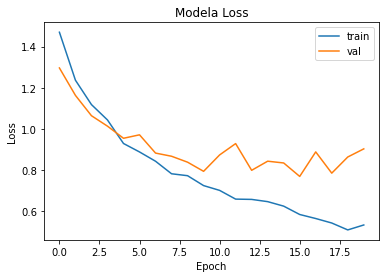

In [155]:
plt.plot(run_A.history['loss'])
plt.plot(run_A.history['val_loss'])
plt.title('Modela Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])

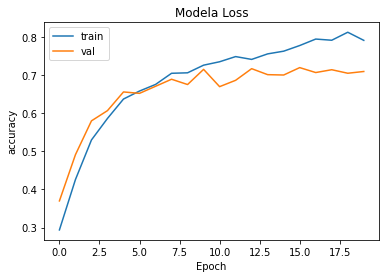

In [156]:
plt.plot(run_A.history['accuracy'])
plt.plot(run_A.history['val_accuracy'])
plt.title('Modela Loss')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])

In [157]:
training_loss, training_acc = model_A.evaluate(x_train, y_train)
testing_loss, testing_acc = model_A.evaluate(x_test, y_test)

print("Accuracy on train set is %f" %(training_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(testing_acc * 100)  + "%")

34/34 [==============================] - 1s 44ms/step - loss: 0.8788 - accuracy: 0.7243
Accuracy on train set is 83.436149%
Accuracy on validation set is 72.432935%


# PART B - ACTIVATION FUNCTION (10 POINTS)
On your Deep Learning model data
Change the activation function. How does it affect accuracy? How does it affect how quickly the network plateaus?

In [158]:
model_B = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(5,5),padding ='same',strides=(2,2),activation=tf.nn.leaky_relu,input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,(5,5),padding ='same',strides=(2,2),activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,(5,5),padding ='same',strides=(2,2),activation=tf.nn.leaky_relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='sigmoid'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(5,activation='softmax')
])

In [159]:
tensorboard_B = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelB'+ str(time())))

In [160]:
model_B.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 64, 64, 64)        4864      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 4, 4, 256)         819456    
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 1, 1, 512)       

In [161]:
model_B.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [162]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)

In [163]:
run_B =model_B.fit(datagenerator.flow(x_train,y_train,batch_size=32),epochs=20,callbacks=tensorboard_B,validation_data=datagenerator.flow(x_test,y_test))

Epoch 1/20
102/102 [==============================] - 35s 338ms/step - loss: 1.4893 - accuracy: 0.3649 - val_loss: 1.2844 - val_accuracy: 0.4357
Epoch 2/20
102/102 [==============================] - 33s 322ms/step - loss: 1.2695 - accuracy: 0.4605 - val_loss: 1.2152 - val_accuracy: 0.5458
Epoch 3/20
102/102 [==============================] - 34s 330ms/step - loss: 1.1444 - accuracy: 0.5373 - val_loss: 1.0703 - val_accuracy: 0.5865
Epoch 4/20
102/102 [==============================] - 34s 329ms/step - loss: 1.0595 - accuracy: 0.5793 - val_loss: 1.1611 - val_accuracy: 0.5356
Epoch 5/20
102/102 [==============================] - 33s 321ms/step - loss: 0.9987 - accuracy: 0.6080 - val_loss: 0.9896 - val_accuracy: 0.5902
Epoch 6/20
102/102 [==============================] - 33s 327ms/step - loss: 0.9199 - accuracy: 0.6277 - val_loss: 0.8923 - val_accuracy: 0.6485
Epoch 7/20
102/102 [==============================] - 33s 322ms/step - loss: 0.8883 - accuracy: 0.6505 - val_loss: 0.8951 - val_ac

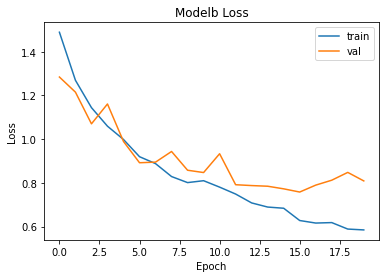

In [164]:
plt.plot(run_B.history['loss'])
plt.plot(run_B.history['val_loss'])
plt.title('Modelb Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])

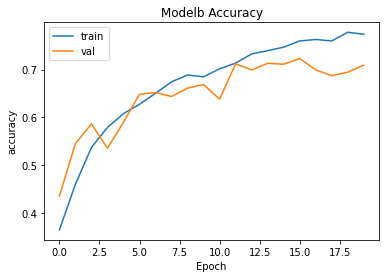

In [165]:
plt.plot(run_B.history['accuracy'])
plt.plot(run_B.history['val_accuracy'])
plt.title('Modelb Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])

In [166]:
training_loss, training_acc = model_B.evaluate(x_train, y_train)
testing_loss, testing_acc = model_B.evaluate(x_test, y_test)

print("Accuracy on train set is %f" %(training_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(testing_acc * 100)  + "%")

34/34 [==============================] - 2s 47ms/step - loss: 0.7509 - accuracy: 0.7317
Accuracy on train set is 80.598396%
Accuracy on validation set is 73.172987%


### The baseline model A is having activation function relu. In model B, we changed the activation function from relu to leaky relu.

### It is observed that, initially leaky relu worked better till 3 epochs but after that accuracy of relu is good till 20 epochs

# PART C - COST FUNCTION
Change the cost function. How does it affect accuracy? How does it affect how quickly the network plateaus?

In [167]:
model_C = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(5,5),padding ='same',strides=(2,2),activation='relu',input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(5,activation='softmax')
])

In [168]:
tensorboard_C = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelC'+ str(time())))

In [169]:
model_C.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 64, 64, 64)        4864      
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 4, 4, 256)         819456    
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 1, 1, 512)       

In [170]:
model_C.compile(optimizer='adam',loss='kullback_leibler_divergence',metrics=['accuracy'])

In [171]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)

In [172]:
run_C =model_C.fit(datagenerator.flow(x_train,y_train,batch_size=32),epochs=20,callbacks=tensorboard_C,validation_data=datagenerator.flow(x_test,y_test))

Epoch 1/20
102/102 [==============================] - 32s 318ms/step - loss: 1.4763 - accuracy: 0.3288 - val_loss: 1.2795 - val_accuracy: 0.3941
Epoch 2/20
102/102 [==============================] - 32s 310ms/step - loss: 1.2245 - accuracy: 0.4571 - val_loss: 1.1984 - val_accuracy: 0.4727
Epoch 3/20
102/102 [==============================] - 32s 309ms/step - loss: 1.1314 - accuracy: 0.5167 - val_loss: 1.2307 - val_accuracy: 0.4773
Epoch 4/20
102/102 [==============================] - 32s 311ms/step - loss: 1.0774 - accuracy: 0.5484 - val_loss: 1.0954 - val_accuracy: 0.5689
Epoch 5/20
102/102 [==============================] - 32s 309ms/step - loss: 1.0350 - accuracy: 0.5851 - val_loss: 1.0373 - val_accuracy: 0.5763
Epoch 6/20
102/102 [==============================] - 31s 309ms/step - loss: 0.9625 - accuracy: 0.6240 - val_loss: 0.9785 - val_accuracy: 0.6105
Epoch 7/20
102/102 [==============================] - 32s 311ms/step - loss: 0.9069 - accuracy: 0.6477 - val_loss: 0.9508 - val_ac

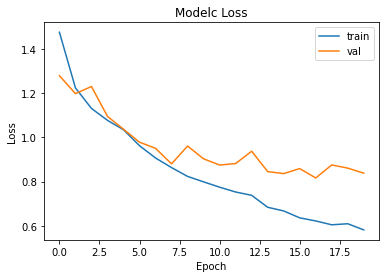

In [173]:
plt.plot(run_C.history['loss'])
plt.plot(run_C.history['val_loss'])
plt.title('Modelc Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])

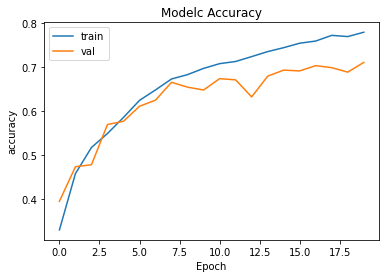

In [174]:
plt.plot(run_C.history['accuracy'])
plt.plot(run_C.history['val_accuracy'])
plt.title('Modelc Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])

In [175]:
training_loss, training_acc = model_C.evaluate(x_train, y_train)
testing_loss, testing_acc = model_C.evaluate(x_test, y_test)

print("Accuracy on train set is %f" %(training_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(testing_acc * 100)  + "%")

34/34 [==============================] - 1s 41ms/step - loss: 0.8073 - accuracy: 0.7262
Accuracy on train set is 82.479948%
Accuracy on validation set is 72.617948%


### The baseline model A was having cost function categorical_crossentropy. In model C, we changed the cost function from relu to kullback_leibler_divergence.

### It is observed that, initially kullback_leibler_divergence worked better upto 1 epoch only while, the accuracy of categorical_crossentropy is good till 20 epochs

# PART D - EPOCHS
On your Deep Learning model data change the number of epochs initialization. How does it affect accuracy? How quickly does the network plateau?

In [176]:
tensorboard_D = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelD'+ str(time())))

In [177]:
run_D =model_A.fit(datagenerator.flow(x_train,y_train,batch_size=32),callbacks=tensorboard_D,epochs=40,validation_data=datagenerator.flow(x_test,y_test))

Epoch 1/40
102/102 [==============================] - 33s 322ms/step - loss: 0.4768 - accuracy: 0.8211 - val_loss: 0.7899 - val_accuracy: 0.7271
Epoch 2/40
102/102 [==============================] - 34s 334ms/step - loss: 0.4658 - accuracy: 0.8254 - val_loss: 0.8166 - val_accuracy: 0.7206
Epoch 3/40
102/102 [==============================] - 33s 327ms/step - loss: 0.4736 - accuracy: 0.8220 - val_loss: 0.8115 - val_accuracy: 0.7114
Epoch 4/40
102/102 [==============================] - 46s 448ms/step - loss: 0.4556 - accuracy: 0.8270 - val_loss: 0.8258 - val_accuracy: 0.7206
Epoch 5/40
102/102 [==============================] - 46s 451ms/step - loss: 0.4386 - accuracy: 0.8384 - val_loss: 0.8080 - val_accuracy: 0.7391
Epoch 6/40
102/102 [==============================] - 42s 412ms/step - loss: 0.4132 - accuracy: 0.8510 - val_loss: 0.8424 - val_accuracy: 0.7114
Epoch 7/40
102/102 [==============================] - 41s 404ms/step - loss: 0.3836 - accuracy: 0.8560 - val_loss: 0.7931 - val_ac

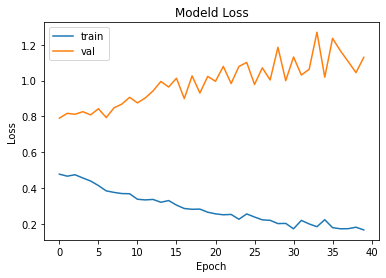

In [178]:
plt.plot(run_D.history['loss'])
plt.plot(run_D.history['val_loss'])
plt.title('Modeld Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])

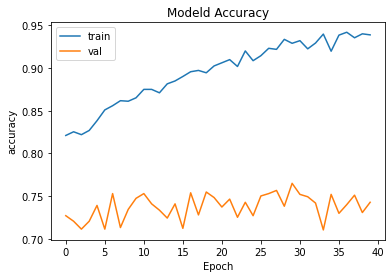

In [179]:
plt.plot(run_D.history['accuracy'])
plt.plot(run_D.history['val_accuracy'])
plt.title('Modeld Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])

In [181]:
training_loss, training_acc = model_A.evaluate(x_train, y_train)
testing_loss, testing_acc = model_A.evaluate(x_test, y_test)

print("Accuracy on train set is %f" %(training_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(testing_acc * 100)  + "%")

34/34 [==============================] - 2s 69ms/step - loss: 1.0734 - accuracy: 0.7623
Accuracy on train set is 95.681679%
Accuracy on validation set is 76.225716%


### The baseline model A is having 20 epochs. But, when we changed the number of epochs from 20 to 40 in model D there is an increase in model's accuracy

# PART E - GRADIENT ESTIMATION
On your Deep Learning model

Change the gradient estimation. How does it affect accuracy? How does it affect how quickly the network plateaus?
Various forms of gradient estimation:

In [182]:
model_E = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(5,5),padding ='same',strides=(2,2),activation='relu',input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(5,activation='softmax')
])

In [183]:
tensorboard_E = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelE'+ str(time())))

In [184]:
model_E.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 64, 64, 64)        4864      
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 4, 4, 256)         819456    
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 1, 1, 512)       

In [185]:
model_E.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [186]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)

In [187]:
run_E =model_E.fit(datagenerator.flow(x_train,y_train,batch_size=32),epochs=20,callbacks=tensorboard_E,validation_data=datagenerator.flow(x_test,y_test))

Epoch 1/20
102/102 [==============================] - 46s 456ms/step - loss: 1.6050 - accuracy: 0.2529 - val_loss: 1.5997 - val_accuracy: 0.2923
Epoch 2/20
102/102 [==============================] - 43s 419ms/step - loss: 1.5990 - accuracy: 0.2927 - val_loss: 1.5944 - val_accuracy: 0.2942
Epoch 3/20
102/102 [==============================] - 41s 404ms/step - loss: 1.5947 - accuracy: 0.2986 - val_loss: 1.5891 - val_accuracy: 0.3488
Epoch 4/20
102/102 [==============================] - 38s 373ms/step - loss: 1.5879 - accuracy: 0.3316 - val_loss: 1.5840 - val_accuracy: 0.2599
Epoch 5/20
102/102 [==============================] - 38s 369ms/step - loss: 1.5763 - accuracy: 0.3260 - val_loss: 1.5638 - val_accuracy: 0.3404
Epoch 6/20
102/102 [==============================] - 40s 387ms/step - loss: 1.5413 - accuracy: 0.3498 - val_loss: 1.5057 - val_accuracy: 0.3756
Epoch 7/20
102/102 [==============================] - 39s 380ms/step - loss: 1.4556 - accuracy: 0.3621 - val_loss: 1.4416 - val_ac

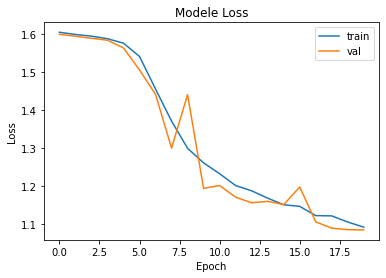

In [188]:
plt.plot(run_E.history['loss'])
plt.plot(run_E.history['val_loss'])
plt.title('Modele Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])

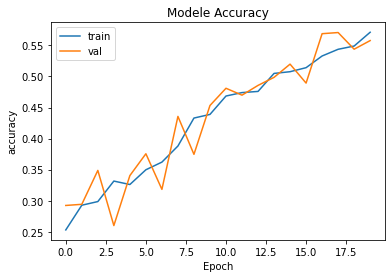

In [189]:
plt.plot(run_E.history['accuracy'])
plt.plot(run_E.history['val_accuracy'])
plt.title('Modele Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])

In [190]:
training_loss, training_acc = model_E.evaluate(x_train, y_train)
testing_loss, testing_acc = modele.evaluate(x_test, y_test)

print("Accuracy on train set is %f" %(training_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(testing_acc * 100)  + "%")

34/34 [==============================] - 2s 52ms/step - loss: 1.0627 - accuracy: 0.5597
Accuracy on train set is 59.808761%
Accuracy on validation set is 55.966699%


### The baseline model A has adam optimize. In model E, we changed the optimizer to SGD. By changing the optimizer, we are getting very less accuracy

## PART F - NETWORK ARCHITECTURE 
On your Deep Learning model change the network architecture. How does it affect accuracy? How does it affect how quickly the network plateaus?

In [191]:
model_F = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(5,5),padding ='same',strides=(2,2),activation='relu',input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(5,activation='softmax')
])

In [192]:
tensorboard_F = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelF'+ str(time())))

In [193]:
model_F.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 64, 64, 64)        4864      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 4, 4, 256)         819456    
_________________________________________________________________
flatten_32 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 1024)            

In [194]:
model_F.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [195]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)

In [196]:
run_F =run_F.fit(datagenerator.flow(x_train,y_train,batch_size=32),epochs=20,callbacks=tensorboard_F,validation_data=datagenerator.flow(x_test,y_test))

Epoch 1/20
102/102 [==============================] - 30s 290ms/step - loss: 1.3902 - accuracy: 0.3779 - val_loss: 1.2409 - val_accuracy: 0.4487
Epoch 2/20
102/102 [==============================] - 27s 260ms/step - loss: 1.1134 - accuracy: 0.5466 - val_loss: 1.1721 - val_accuracy: 0.5643
Epoch 3/20
102/102 [==============================] - 25s 249ms/step - loss: 1.0409 - accuracy: 0.5824 - val_loss: 1.0160 - val_accuracy: 0.5791
Epoch 4/20
102/102 [==============================] - 24s 237ms/step - loss: 0.9455 - accuracy: 0.6258 - val_loss: 1.0714 - val_accuracy: 0.5846
Epoch 5/20
102/102 [==============================] - 24s 233ms/step - loss: 0.9091 - accuracy: 0.6533 - val_loss: 0.8999 - val_accuracy: 0.6401
Epoch 6/20
102/102 [==============================] - 26s 259ms/step - loss: 0.8720 - accuracy: 0.6579 - val_loss: 0.9250 - val_accuracy: 0.6411
Epoch 7/20
102/102 [==============================] - 25s 248ms/step - loss: 0.8155 - accuracy: 0.6801 - val_loss: 0.9386 - val_ac

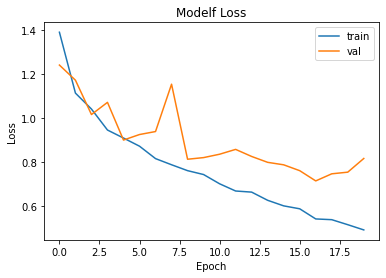

In [197]:
plt.plot(run_F.history['loss'])
plt.plot(run_F.history['val_loss'])
plt.title('Modelf Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])

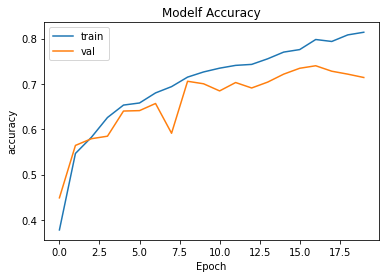

In [198]:
plt.plot(run_F.history['accuracy'])
plt.plot(run_F.history['val_accuracy'])
plt.title('Modelf Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])

In [199]:
training_loss, training_acc = model_F.evaluate(x_train, y_train)
testing_loss, testing_acc = model_F.evaluate(x_test, y_test)

print("Accuracy on train set is %f" %(training_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(testing_acc * 100)  + "%")

34/34 [==============================] - 1s 39ms/step - loss: 0.7404 - accuracy: 0.7493
Accuracy on train set is 85.410243%
Accuracy on validation set is 74.930620%


### In model F after changing the network architecture there is significant decrease in accuracy

# PART G - NETWORK INITIALIZATION
On your Deep Learning model

Change the network initialization. How does it affect accuracy? How does it affect how quickly the network plateaus?

In [200]:
from keras.initializers import Initializer

## GlorotNormal

In [201]:
model_G = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(64,(5,5),padding ='same',strides=(2,2),activation='relu',input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(5,activation='softmax',kernel_initializer=tf.keras.initializers.GlorotNormal), 
])

In [202]:
tensorboard_G = TensorBoard(log_dir = 'Visualisation/{}'.format('ModelG'+ str(time())))

In [203]:
model_G.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_132 (Conv2D)          (None, 64, 64, 64)        4864      
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 4, 4, 256)         819456    
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 1, 1, 512)       

In [204]:
model_G.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [205]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)

In [206]:
run_G =model_G.fit(datagenerator.flow(x_train,y_train,batch_size=32),epochs=20,callbacks=tensorboard_G,validation_data=datagenerator.flow(x_test,y_test))

Epoch 1/20
102/102 [==============================] - 39s 381ms/step - loss: 1.4055 - accuracy: 0.3587 - val_loss: 1.3011 - val_accuracy: 0.4357
Epoch 2/20
102/102 [==============================] - 39s 385ms/step - loss: 1.2432 - accuracy: 0.4365 - val_loss: 1.1811 - val_accuracy: 0.4764
Epoch 3/20
102/102 [==============================] - 42s 408ms/step - loss: 1.1269 - accuracy: 0.5305 - val_loss: 1.1589 - val_accuracy: 0.5273
Epoch 4/20
102/102 [==============================] - 49s 483ms/step - loss: 1.0273 - accuracy: 0.5879 - val_loss: 0.9781 - val_accuracy: 0.6226
Epoch 5/20
102/102 [==============================] - 45s 444ms/step - loss: 0.9521 - accuracy: 0.6385 - val_loss: 0.9946 - val_accuracy: 0.6031
Epoch 6/20
102/102 [==============================] - 36s 357ms/step - loss: 0.9233 - accuracy: 0.6450 - val_loss: 0.9126 - val_accuracy: 0.6420
Epoch 7/20
102/102 [==============================] - 39s 383ms/step - loss: 0.8752 - accuracy: 0.6552 - val_loss: 0.8850 - val_ac

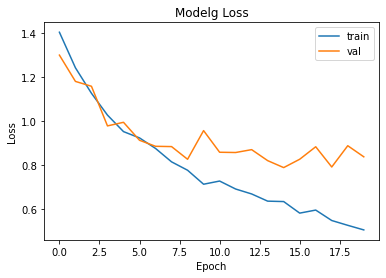

In [207]:
plt.plot(run_G.history['loss'])
plt.plot(run_G.history['val_loss'])
plt.title('Modelg Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])

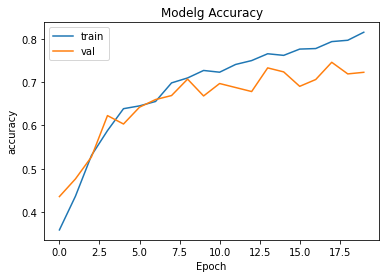

In [208]:
plt.plot(run_G.history['accuracy'])
plt.plot(run_G.history['val_accuracy'])
plt.title('Modelg Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])

In [209]:
training_loss, training_acc = model_G.evaluate(x_train, y_train)
testing_loss, testing_acc = model_G.evaluate(x_test, y_test)

print("Accuracy on train set is %f" %(training_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(testing_acc * 100)  + "%")

34/34 [==============================] - 2s 49ms/step - loss: 0.8640 - accuracy: 0.7197
Accuracy on train set is 81.801355%
Accuracy on validation set is 71.970397%


### The model's performance declines by significant amount when we change the initializer from default to GlorotNormal

<h1><b>License</b></h1>

Copyright 2022 Abhishek Jaiswal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.